In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv('athlete_events.csv')

In [5]:
df.shape

(271116, 15)

In [6]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


###### Sounds like 'Games' column has duplicated values with 'Year' & 'Season' columns, ascertain that later
###### Sounds like 'NOC' column is duplicated with 'Team' columns, let's look over that later
###### I think that National Olympic Committee (NOC) has no relationship with winning the team, besides 'Name' feature
###### Observe having null values in target varaiable(Medal)
###### Want to detect correlation between 'Sex' and 'Medal'
###### Want to detect correlation between each one of 'Age', 'Height', 'Weight' features separately and grouped with 'Medal'
###### Want to detect for each sport, in which 'Sex' is better 

### Detect 'Games' column to decide to drop it or not

In [7]:
df['Games'].unique()

array(['1992 Summer', '2012 Summer', '1920 Summer', '1900 Summer',
       '1988 Winter', '1992 Winter', '1994 Winter', '1932 Summer',
       '2002 Winter', '1952 Summer', '1980 Winter', '2000 Summer',
       '1996 Summer', '1912 Summer', '1924 Summer', '2014 Winter',
       '1948 Summer', '1998 Winter', '2006 Winter', '2008 Summer',
       '2016 Summer', '2004 Summer', '1960 Winter', '1964 Winter',
       '1984 Winter', '1984 Summer', '1968 Summer', '1972 Summer',
       '1988 Summer', '1936 Summer', '1952 Winter', '1956 Winter',
       '1956 Summer', '1960 Summer', '1928 Summer', '1976 Summer',
       '1980 Summer', '1964 Summer', '2010 Winter', '1968 Winter',
       '1906 Summer', '1972 Winter', '1976 Winter', '1924 Winter',
       '1904 Summer', '1928 Winter', '1908 Summer', '1948 Winter',
       '1932 Winter', '1936 Winter', '1896 Summer'], dtype=object)

In [8]:
df['Games'].map(lambda x: x.split(' ')[1]).unique()

array(['Summer', 'Winter'], dtype=object)

In [9]:
df['Season'].unique()

array(['Summer', 'Winter'], dtype=object)

In [10]:
print(df['Games'].map(lambda x: x.split(' ')[0]).unique(),'\n')
print(df['Year'].unique())

['1992' '2012' '1920' '1900' '1988' '1994' '1932' '2002' '1952' '1980'
 '2000' '1996' '1912' '1924' '2014' '1948' '1998' '2006' '2008' '2016'
 '2004' '1960' '1964' '1984' '1968' '1972' '1936' '1956' '1928' '1976'
 '2010' '1906' '1904' '1908' '1896'] 

[1992 2012 1920 1900 1988 1994 1932 2002 1952 1980 2000 1996 1912 1924
 2014 1948 1998 2006 2008 2016 2004 1960 1964 1984 1968 1972 1936 1956
 1928 1976 2010 1906 1904 1908 1896]


###### Observe that 'Games' column include duplicated data with 'Year' & 'Season' columns, then we'll drop 'Games' column

In [11]:
df.shape

(271116, 15)

In [12]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [13]:
df.isnull().mean()

ID        0.000000
Name      0.000000
Sex       0.000000
Age       0.034944
Height    0.221938
Weight    0.231912
Team      0.000000
NOC       0.000000
Games     0.000000
Year      0.000000
Season    0.000000
City      0.000000
Sport     0.000000
Event     0.000000
Medal     0.853262
dtype: float64

* We have 4 columns with null values ['Age', 'Height', 'Weight', 'Medal']
* percentage of missing values is not that high, so we can impute them
* Most of Medal's values are missing, since Medal is the target variable we can't drop it, so we'll replace them with meaningful value

In [14]:
df['Medal'].unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

##### Since null values are non of the other high medal ranks, we could consider it as 'not won'

In [15]:
df['Medal'].fillna('Not won', inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   271116 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


###### Observe having categorical features, let's detect them

In [17]:
categorical_data = df.select_dtypes(['object']).copy() 
categorical_data.head()

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal
0,A Dijiang,M,China,CHN,1992 Summer,Summer,Barcelona,Basketball,Basketball Men's Basketball,Not won
1,A Lamusi,M,China,CHN,2012 Summer,Summer,London,Judo,Judo Men's Extra-Lightweight,Not won
2,Gunnar Nielsen Aaby,M,Denmark,DEN,1920 Summer,Summer,Antwerpen,Football,Football Men's Football,Not won
3,Edgar Lindenau Aabye,M,Denmark/Sweden,DEN,1900 Summer,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,Netherlands,NED,1988 Winter,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,Not won


In [18]:
categorical_data.describe()

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal
count,271116,271116,271116,271116,271116,271116,271116,271116,271116,271116
unique,134732,2,1184,230,51,2,42,66,765,4
top,Robert Tait McKenzie,M,United States,USA,2000 Summer,Summer,London,Athletics,Football Men's Football,Not won
freq,58,196594,17847,18853,13821,222552,22426,38624,5733,231333


In [19]:
perc =[.25, .50, .75, .90, .993]
desc = df.describe(percentiles = perc)
desc

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
90%,122194.000000,33.000000,188.000000,89.000000,2012.000000
99.3%,134712.195000,51.000000,202.000000,120.000000,2016.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


###### Since mean and median for these features are almost the same, so there is no preference to use one over the other in mputing missing values

In [20]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [21]:
df['Height'].fillna(df['Height'].mean(), inplace=True)

In [22]:
df['Weight'].fillna(df['Weight'].mean(), inplace=True)

###### Let's make sure we've handled all missing vlues

In [23]:
df.isnull().any()

ID        False
Name      False
Sex       False
Age       False
Height    False
Weight    False
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal     False
dtype: bool

##### No missing values left

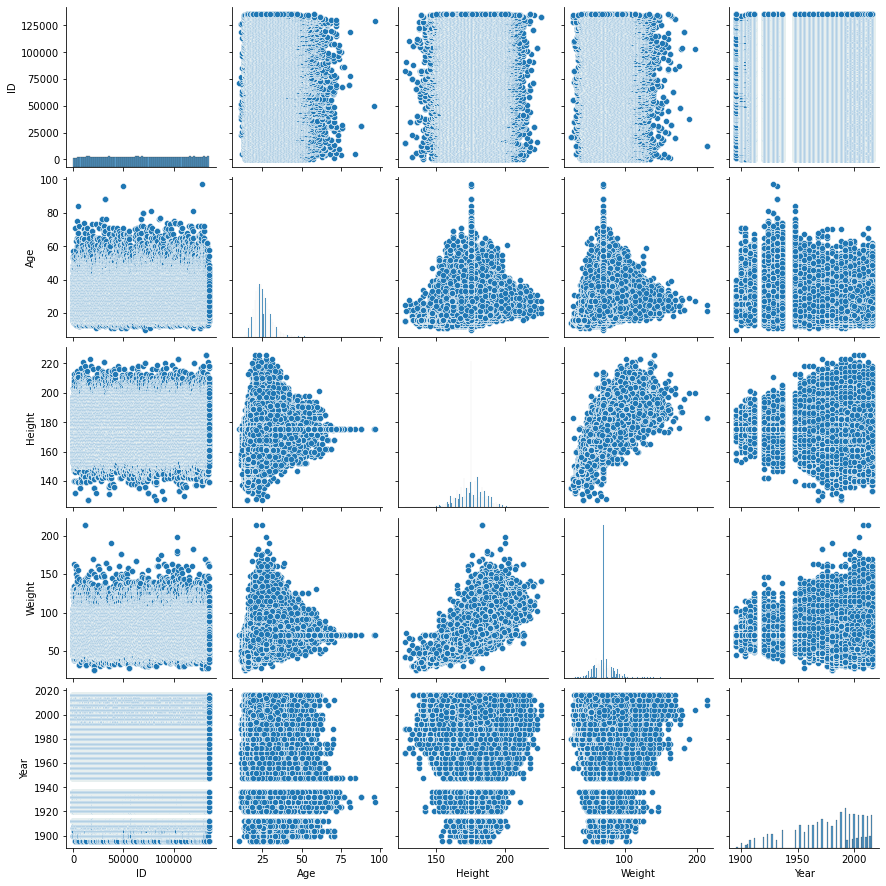

In [24]:
sns.pairplot(data=df)
plt.show()

'Height' and 'Weight' columns are positively correlated

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Weight'}>],
       [<AxesSubplot:title={'center':'Year'}>, <AxesSubplot:>]],
      dtype=object)

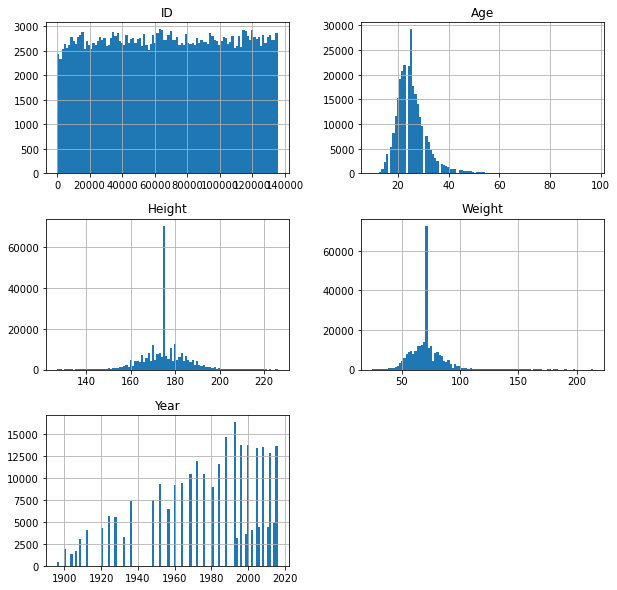

In [25]:
#Detect distribution and skewness for features
df.hist(figsize=(10,10), bins=100)

* 'Weight' and 'Height' features are almost normally distributed...
* 'Year' feature is left skewed, as Olympics have evolved over time
* 'Age' feature is slightly right skewed, as the most gathered in the age between 20-30
* 'ID' feature has uniform distribution, therefore we'll drop it, as its p-value is almost=1, besides It's a ratio data with just sequential numbers that has no relationship with any other feature and won't affect their results

In [26]:
df.drop(['ID'], 1, inplace=True)

C:\Users\DEll\AppData\Local\Temp/ipykernel_15320/26211773.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(['ID'], 1, inplace=True)


## Detect correlation and skeweness

<AxesSubplot:>

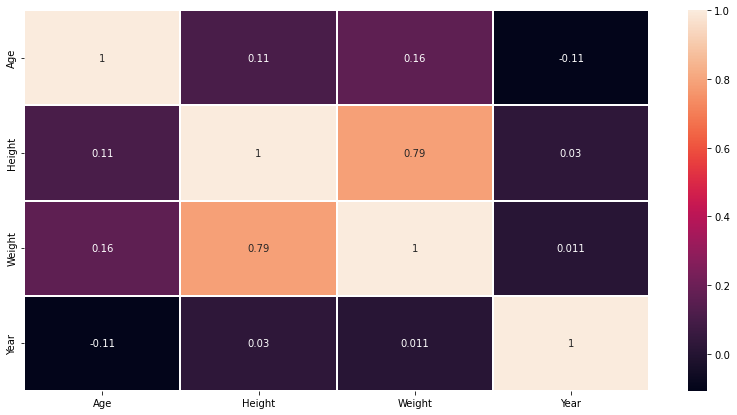

In [27]:
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(), annot=True, linewidths=0.05)

In [33]:
#Convert the Categorial to Numiruc
dfn=df.drop(['Medal'],1)
cat_columns = dfn.select_dtypes(['object']).columns
dfn[cat_columns] = dfn[cat_columns].apply(lambda x: pd.factorize(x)[0])
dfn.head(5)

C:\Users\DEll\AppData\Local\Temp/ipykernel_15320/2749156663.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dfn=df.drop(['Medal'],1)


,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event
0,0,0,24.0,180.00000,80.000000,0,0,0,1992,0,0,0,0
1,1,0,23.0,170.00000,60.000000,0,0,1,2012,0,1,1,1
2,2,0,24.0,175.33897,70.702393,1,1,2,1920,0,2,2,2
3,3,0,34.0,175.33897,70.702393,2,1,3,1900,0,3,3,3
4,4,1,21.0,185.00000,82.000000,3,2,4,1988,1,4,4,4


In [34]:
#normalization
from sklearn import preprocessing

x = dfn.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dfnn = pd.DataFrame(x_scaled)
dfnn.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.000000,0.0,0.160920,0.535354,0.291005,0.000000,0.000000,0.00,0.800000,0.0,0.000000,0.000000,0.000000
1,0.000007,0.0,0.149425,0.434343,0.185185,0.000000,0.000000,0.02,0.966667,0.0,0.024390,0.015385,0.001309
2,0.000015,0.0,0.160920,0.488272,0.241812,0.000845,0.004367,0.04,0.200000,0.0,0.048780,0.030769,0.002618
3,0.000022,0.0,0.275862,0.488272,0.241812,0.001691,0.004367,0.06,0.033333,0.0,0.073171,0.046154,0.003927
4,0.000030,1.0,0.126437,0.585859,0.301587,0.002536,0.008734,0.08,0.766667,1.0,0.097561,0.061538,0.005236


In [35]:
#Finding Correlation Without normalization
def get_redundant_pairs(dft):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = dft.columns
    for i in range(0, dft.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop
def get_top_abs_correlations(dft, n):
    au_corr = dft.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(dft)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")    
print("==================================================================================================================")
#The Top 10 Correlation
print(get_top_abs_correlations(dfn,10))

Top Absolute Correlations
Games   City      0.846092
Height  Weight    0.786609
Team    NOC       0.606432
Sex     Weight    0.468578
        Height    0.449934
Games   Year      0.306049
Sport   Event     0.305589
Sex     Year      0.289882
        Event     0.288997
        Age       0.177783
dtype: float64


In [36]:
dfn.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event
0,0,0,24.0,180.00000,80.000000,0,0,0,1992,0,0,0,0
1,1,0,23.0,170.00000,60.000000,0,0,1,2012,0,1,1,1
2,2,0,24.0,175.33897,70.702393,1,1,2,1920,0,2,2,2
3,3,0,34.0,175.33897,70.702393,2,1,3,1900,0,3,3,3
4,4,1,21.0,185.00000,82.000000,3,2,4,1988,1,4,4,4


In [38]:
#Finding Correlation With normalization
def get_redundant_pairs(dft):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = dft.columns
    for i in range(0, dft.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop
def get_top_abs_correlations(dft, n):
    au_corr = dft.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(dft)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")    
print("==================================================================================================================")
#The Top 10 Correlation
print(get_top_abs_correlations(dfnn,10))

Top Absolute Correlations
7   10    0.846092
3   4     0.786609
5   6     0.606432
1   4     0.468578
    3     0.449934
7   8     0.306049
11  12    0.305589
1   8     0.289882
    12    0.288997
    2     0.177783
dtype: float64


###### Drop columns with correlation more than 0.5 

In [39]:
#Drop Games
df=df.drop(['Games'],1)
#Drop Weight
df=df.drop(['Weight'],1)
#Drop NOC
df=df.drop(['NOC'],1)
df.head(5)

C:\Users\DEll\AppData\Local\Temp/ipykernel_15320/3359035777.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df=df.drop(['Games'],1)
C:\Users\DEll\AppData\Local\Temp/ipykernel_15320/3359035777.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df=df.drop(['Weight'],1)
C:\Users\DEll\AppData\Local\Temp/ipykernel_15320/3359035777.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df=df.drop(['NOC'],1)


,Name,Sex,Age,Height,Team,Year,Season,City,Sport,Event,Medal
0,A Dijiang,M,24.0,180.00000,China,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Not won
1,A Lamusi,M,23.0,170.00000,China,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,Not won
2,Gunnar Nielsen Aaby,M,24.0,175.33897,Denmark,1920,Summer,Antwerpen,Football,Football Men's Football,Not won
3,Edgar Lindenau Aabye,M,34.0,175.33897,Denmark/Sweden,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.00000,Netherlands,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,Not won


### Distrbuiton of City and its frequency

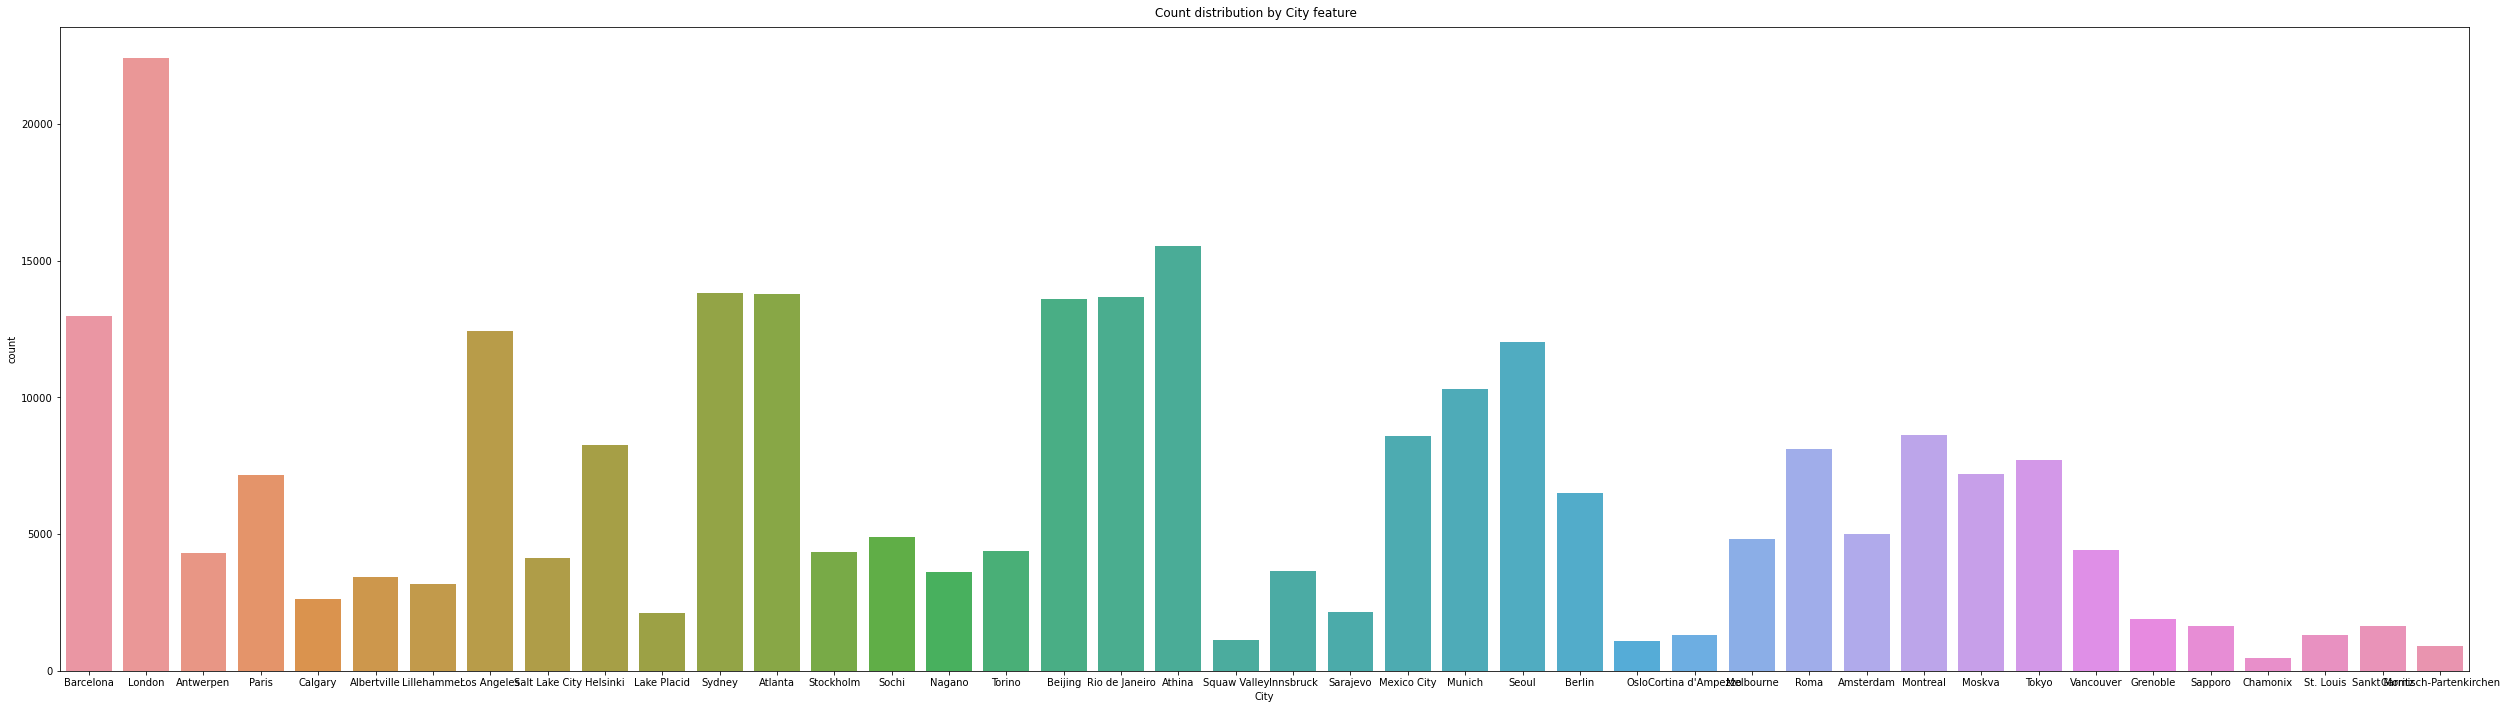

In [40]:
fig= plt.figure(figsize=(35,10))

fig.suptitle("Count distribution by City feature")

sns.countplot(x='City', data=df)
plt.tight_layout() 

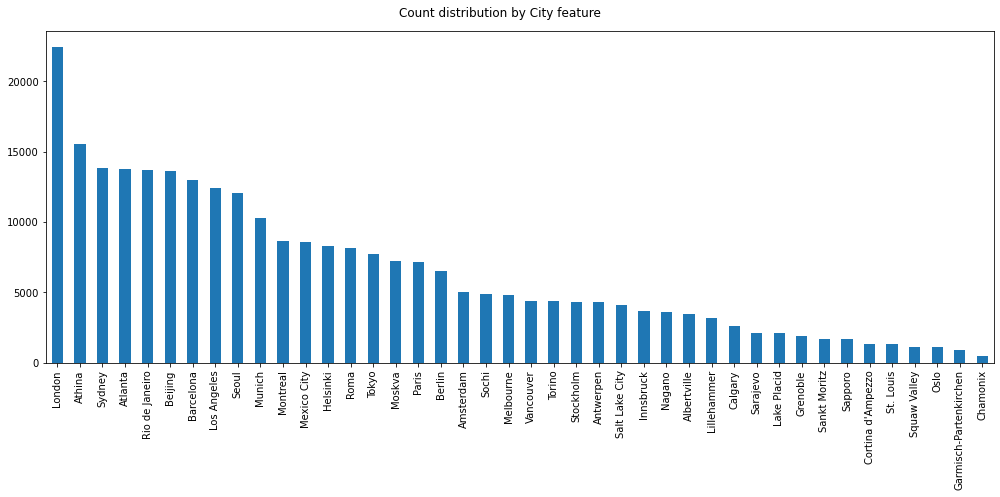

In [41]:
# Sorted
fig= plt.figure(figsize=(14,7))

fig.suptitle("Count distribution by City feature")
df['City'].value_counts().plot.bar()
plt.tight_layout()

* London has hosted the most of times
* Chammonix hosted the competitions the least number of times

### Distrbuiton of Season and its frequency

Text(0, 0.5, 'Frequency')

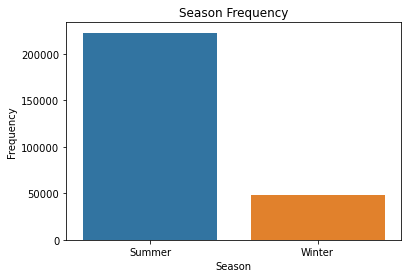

In [42]:
fig, ax = plt.subplots()
sns.countplot(x='Season', data=df)

# set title and labels 
ax.set_title('Season Frequency')
ax.set_ylabel('Frequency')

Although both seasons were held in the same year up until 1992. And then they've been staggered such that each season Games occur on a four year cycle, but it appears that Summer season has frequented more

Text(0, 0.5, 'Frequency')

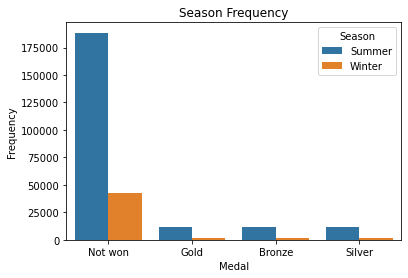

In [43]:
# distrbuiton of Medal and its frequency grouped by 'Season'
fig, ax = plt.subplots()
sns.countplot(data=df, x='Medal', hue='Season')
ax.set_title('Season Frequency')
ax.set_ylabel('Frequency')

<AxesSubplot:xlabel='Medal', ylabel='count'>

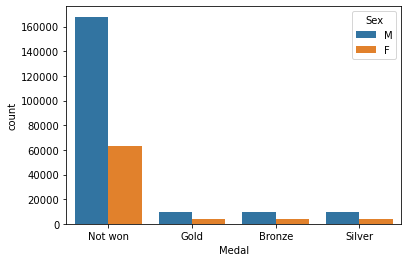

In [44]:
# distrbuiton of Medal and its frequency grouped by 'Sex'
sns.countplot(data=df, x='Medal', hue='Sex')

Text(0, 0.5, 'Frequency')

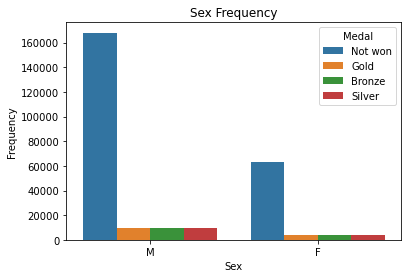

In [45]:
# distrbuiton of Sex and its frequency
fig, ax = plt.subplots()
sns.countplot(x='Sex', data=df, hue='Medal')

# set title and labels 
ax.set_title('Sex Frequency')
ax.set_ylabel('Frequency')

Observe that the predominant gender is male. But it could be that the majority of the participants are basically males

In [46]:
df['Sex'].value_counts(normalize=True)

M    0.725129
F    0.274871
Name: Sex, dtype: float64

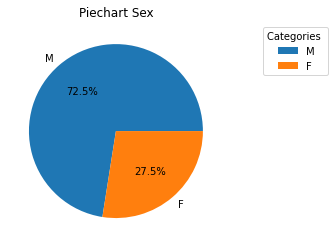

In [47]:
# plotting the pie chart for (Sex) 
sex_frequency = df['Sex'].value_counts()
plt.pie(sex_frequency, 
        labels = df['Sex'].unique(),
        autopct = '%.1f%%'
       )

plt.title("Piechart Sex")
plt.legend(title="Categories ",
          bbox_to_anchor=(0.5, 0, 1, 1)
          )
plt.show()

As expected most of the participants are males, therefore, there is no doubt to have the majority of winners from males gender

In [48]:
# df.groupby(['Medal']).sum().plot(kind='pie', y='Age')

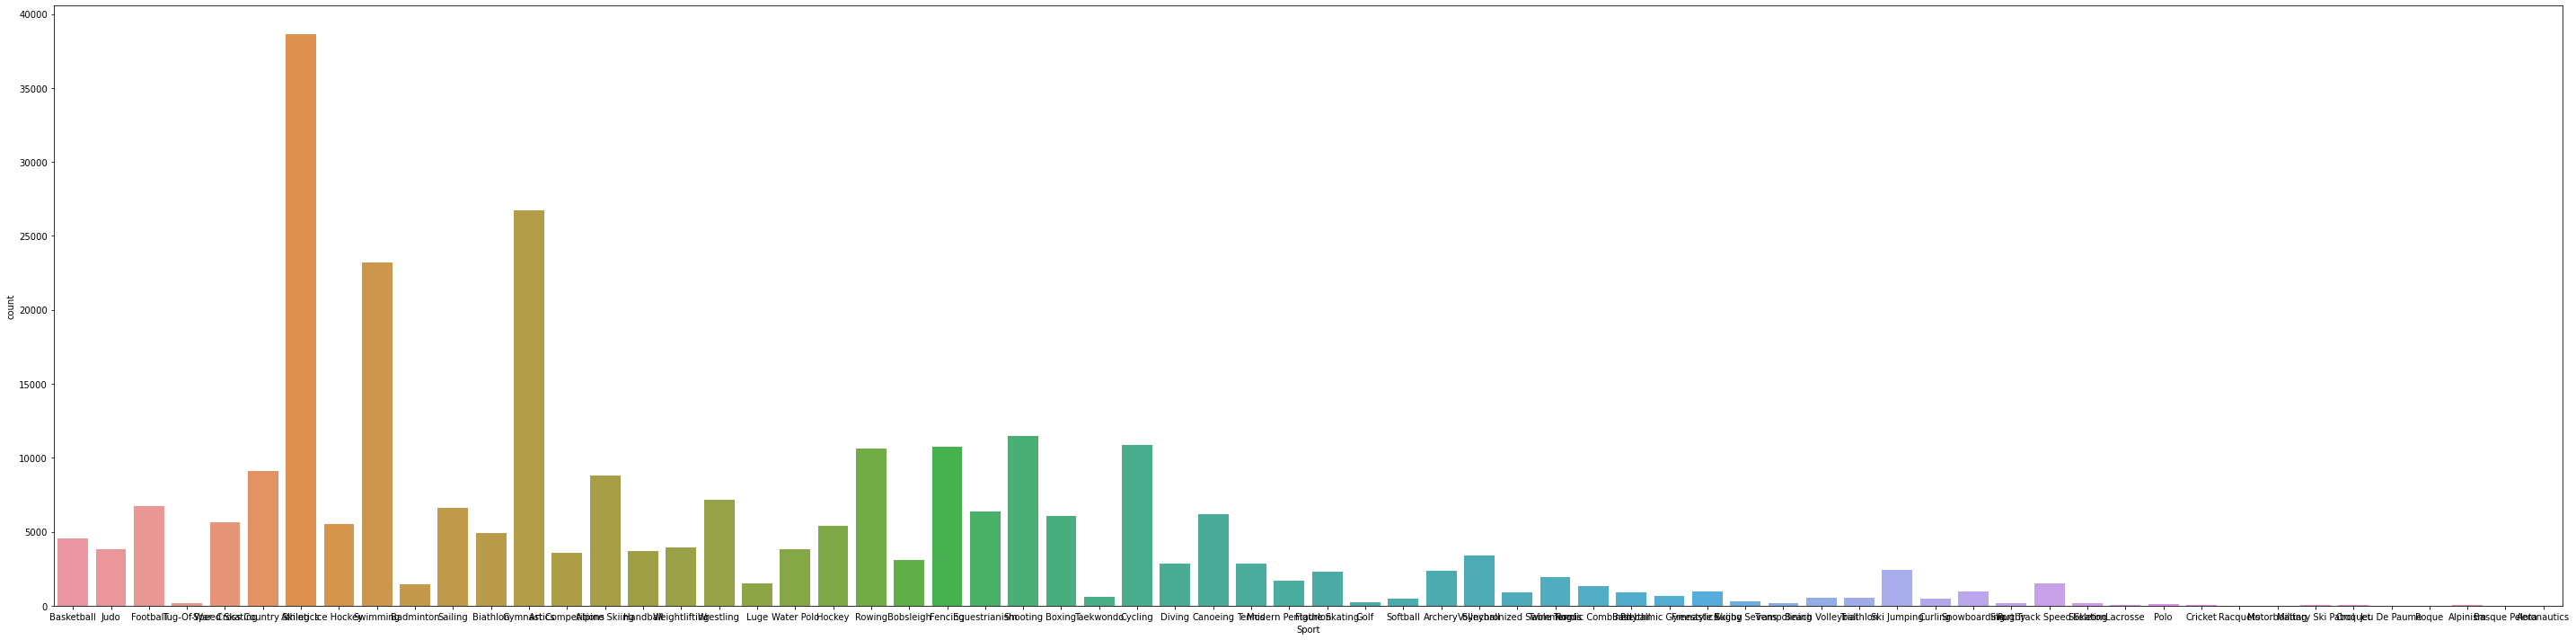

In [49]:
fig= plt.figure(figsize=(40,10))
sns.countplot(data=df, x='Sport')
plt.tight_layout() 

In [50]:
df['Sport'].value_counts(normalize=True).sort_values(ascending=False)

Athletics        0.142463
Gymnastics       0.098508
Swimming         0.085554
Shooting         0.042225
Cycling          0.040053
                   ...   
Racquets         0.000044
Jeu De Paume     0.000041
Roque            0.000015
Basque Pelota    0.000007
Aeronautics      0.000004
Name: Sport, Length: 66, dtype: float64

Most participants in the Olympics along the years were from Athletics sport 

In [51]:
df.groupby(['City'])['Sport'].value_counts(normalize=True)

City         Sport               
Albertville  Alpine Skiing           0.218277
             Cross Country Skiing    0.208673
             Biathlon                0.133003
             Speed Skating           0.103027
             Ice Hockey              0.077707
                                       ...   
Vancouver    Figure Skating          0.033167
             Nordic Combined         0.029759
             Luge                    0.024307
             Curling                 0.021127
             Skeleton                0.010677
Name: Sport, Length: 794, dtype: float64

In [52]:
df.groupby(['City'])['Medal'].value_counts(normalize=True)

City         Medal  
Albertville  Not won    0.907451
             Silver     0.031432
             Bronze     0.030850
             Gold       0.030268
Amsterdam    Not won    0.852965
                          ...   
Torino       Silver     0.039936
Vancouver    Not won    0.881872
             Silver     0.039755
             Gold       0.039527
             Bronze     0.038846
Name: Medal, Length: 168, dtype: float64

# Detect and Handle outliers using Boxplot

<AxesSubplot:>

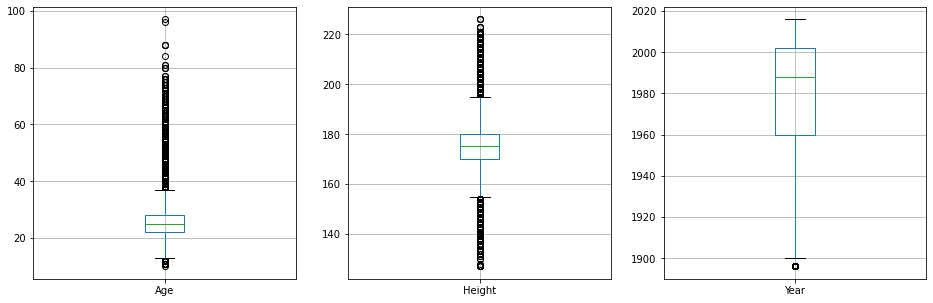

In [55]:
# Plot 3 plots on one row side by side
fig, ax = plt.subplots(1,3, figsize=(16,5))

# casual, registered and count customers box plots
df.boxplot("Age", ax=ax[0])
df.boxplot("Height", ax=ax[1])
df.boxplot("Year", ax=ax[2])

In [56]:
def handle_outliers(feature):
    upper_lim = df[feature].quantile(.95)
    lower_lim = df[feature].quantile(.05)

    return df[(df[feature] < upper_lim) & (df[feature] > lower_lim)]
    
df = handle_outliers('Age')
df = handle_outliers('Height')

<AxesSubplot:>

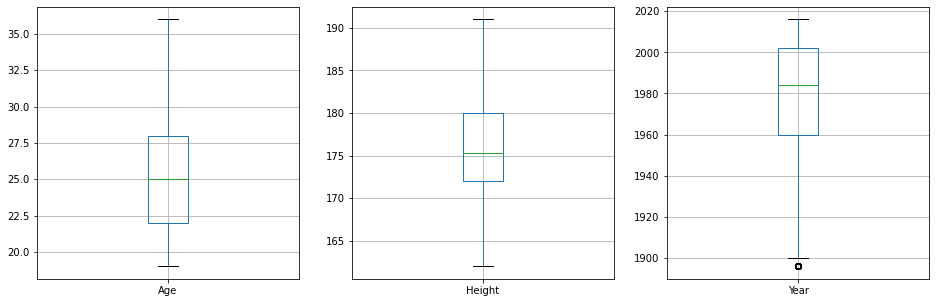

In [58]:
# Plot 3 plots on one row side by side
fig, ax = plt.subplots(1,3, figsize=(16,5))

# casual, registered and count customers box plots
df.boxplot("Age", ax=ax[0])
df.boxplot("Height", ax=ax[1])
df.boxplot("Year", ax=ax[2])

It may be better to keep some outliers to avoid overfitting